# Homework 5

In [4]:
import networkx as nx #pip install networkx
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns

import nltk
import string
from textblob import TextBlob  #Sentiment Analysis - pip install textblob
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn import metrics


from bs4 import BeautifulSoup #pip install beautifulsoup4
import requests
import re


In [5]:
url = 'http://shakespeare.mit.edu/'
main_page=requests.get(url)
soup = BeautifulSoup(main_page.text, "html.parser")

### This hypothesis is about answering the question of whether Shakespeare sentiment of writing style is hanging overtime from his first play until the end. We have downloaded the data by updating the section's code.

In [6]:
#reading title of Shakespeare literary work
title_list = []
i = 0
#finding literature types
lit_types = soup.find_all("table")[1].find_all("tr")
lit_type_list = ['Comedy', 'History', 'Tragedy', 'Poetry']
base_url = 'http://shakespeare.mit.edu/'
for group in lit_types[1].find_all("td"):
    group_len = len(group.find_all("a"))
    group_name = lit_type_list[i]
    print(group_len, " plays in group ", group_name)
    for link in group.find_all("a"):
        temp_dict = {}
        temp_dict['literature_type'] = group_name
        temp_dict['title'] = link.contents[0].strip()
        temp_dict['url'] = base_url + link.attrs['href']
        title_list.append(temp_dict)
    i += 1

17  plays in group  Comedy
10  plays in group  History
10  plays in group  Tragedy
5  plays in group  Poetry


In [7]:
pd.DataFrame(title_list).shape

(42, 3)

### Next we will import each part in the play alone, we have different structure in some plays in term of HTML.

In [10]:
import urllib3
http = urllib3.PoolManager()
play_scene_list = []
for i in range(38):
    #The First part of King Henry the Fourth
    soup = BeautifulSoup(requests.get(pd.DataFrame(title_list)['url'][i]).text, "html.parser")
    #reading content of scenes in play
    for link in soup.find_all("a")[3:]:
        link_s = link.attrs['href']
        if (link_s.count('.') == 3):
            play_scene_dict = {}
            play_scene_dict['literature_type'] = pd.DataFrame(title_list)['literature_type'][i]
            play_scene_dict['title'] = pd.DataFrame(title_list)['title'][i]
            play_scene_dict['scene_title'] = link.contents[0].strip()
            play_scene_dict['scene_url'] = 'http://shakespeare.mit.edu/' + link.attrs['href'].split(".")[0] +'/' + link.attrs['href']
            play_scene_dict['act'] = link_s.split('.')[-3]
            play_scene_dict['scene'] = link_s.split('.')[-2]
            s=BeautifulSoup(requests.get('http://shakespeare.mit.edu/' + link.attrs['href'].split(".")[0] +'/' + link.attrs['href']).text, "html.parser")
            play_scene_dict['text'] =s.get_text()
            play_scene_list.append(play_scene_dict)
            #print(i,link_s)
        elif (link_s.count('.') == 2):
                play_scene_dict = {}
                play_scene_dict['literature_type'] = pd.DataFrame(title_list)['literature_type'][i]
                play_scene_dict['title'] = pd.DataFrame(title_list)['title'][i]
                play_scene_dict['scene_title'] = link.contents[0].strip()
                play_scene_dict['scene_url'] = 'http://shakespeare.mit.edu/Poetry/' + link.attrs['href']
                play_scene_dict['act'] = link_s.split('.')[-2]
                play_scene_dict['scene'] = link.attrs['href'].split(".")[0]+ link_s.split('.')[-2]
                s=BeautifulSoup(requests.get('http://shakespeare.mit.edu/Poetry/' + link.attrs['href']).text, "html.parser")
                play_scene_dict['text'] =s.get_text()
                play_scene_list.append(play_scene_dict)
        else: 
            print(link_s)
            pass
        
for i in (38,39,40,41):
            soup = BeautifulSoup(requests.get(pd.DataFrame(title_list)['url'][i]).text, "html.parser")
            play_scene_dict = {}
            play_scene_dict['literature_type'] = pd.DataFrame(title_list)['literature_type'][i]
            play_scene_dict['title'] = pd.DataFrame(title_list)['title'][i]
            play_scene_dict['scene_title'] = pd.DataFrame(title_list)['url'][i].split("/")[-1].split(".")[-2]
            play_scene_dict['scene_url'] = pd.DataFrame(title_list)['url'][i]
            play_scene_dict['act'] = pd.DataFrame(title_list)['url'][i].split("/")[-1].split(".")[-2]
            play_scene_dict['scene'] = pd.DataFrame(title_list)['url'][i].split("/")[-1].split(".")[-2]
            s=BeautifulSoup(requests.get(pd.DataFrame(title_list)['url'][i]).text, "html.parser")
            play_scene_dict['text'] =s.get_text()
            play_scene_list.append(play_scene_dict)

full.html


In [11]:
pd.DataFrame(play_scene_list)['title'][100]

'Measure for Measure'

### In the above code, based on section code, I have automate the creation of each scene and act url. The last part of Poetry differs from the previous, thats why it is coded seperately with some special adjustment

In [12]:
set(pd.DataFrame(play_scene_list)['title'])

{"A Lover's Complaint",
 "A Midsummer Night's Dream",
 "All's Well That Ends Well",
 'Antony and Cleopatra',
 'As You Like It',
 'Coriolanus',
 'Cymbeline',
 'Funeral Elegy by W.S.',
 'Hamlet',
 'Henry IV, part 1',
 'Henry IV, part 2',
 'Henry V',
 'Henry VI, part 1',
 'Henry VI, part 2',
 'Henry VI, part 3',
 'Henry VIII',
 'Julius Caesar',
 'King John',
 'King Lear',
 "Love's Labours Lost",
 'Macbeth',
 'Measure for Measure',
 'Much Ado About Nothing',
 'Othello',
 'Pericles, Prince of Tyre',
 'Richard II',
 'Richard III',
 'Romeo and Juliet',
 'Taming of the Shrew',
 'The\nMerry Wives of Windsor',
 'The Comedy of Errors',
 'The Merchant of Venice',
 'The Rape of Lucrece',
 'The Sonnets',
 'The Tempest',
 'Timon of Athens',
 'Titus Andronicus',
 'Troilus and Cressida',
 'Twelfth Night',
 'Two Gentlemen of Verona',
 'Venus and Adonis',
 "Winter's Tale"}

### The list of above works by shakspeare is dated on another website (https://www.thoughtco.com/list-of-shakespeare-plays-2985250) and i have got from their a listing by time which will be added to the above dataframe.


In [14]:
dates= pd.read_csv("ranks plays.csv")
dates['title'][24]='The\nMerry Wives of Windsor'

C:\Users\User\Anaconda3v1\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
play_scene_list1=pd.DataFrame(play_scene_list).merge(dates, on='title', how='left')

### Therefore the above data frame play_scene_list1 contains the data of all shakespeare plays with an index under Date collumns to sort plays in chronological order.

### In the following part, we will do sentiment analysis on each play to differentiate between the degree of positivity and negativity and then track it overtime to see if the if the behavior of shakespear is changing overtime.

In [16]:
play_scene_list1['text'][1]

"\n\n\nSCENE II. Paris. The KING's palace.\n \n\n\n\n\n\nAll's Well That Ends Well\n\nShakespeare homepage \n    | All's Well That Ends Well \n    | Act 1, Scene 2\n   \nPrevious scene\n    | Next scene\n\nSCENE II. Paris. The KING's palace.\n\nFlourish of cornets. Enter the KING of France, with letters, and divers Attendants\n\nKING\n\nThe Florentines and Senoys are by the ears;\nHave fought with equal fortune and continue\nA braving war.\n\nFirst Lord\n\n                  So 'tis reported, sir.\n\nKING\n\nNay, 'tis most credible; we here received it\nA certainty, vouch'd from our cousin Austria,\nWith caution that the Florentine will move us\nFor speedy aid; wherein our dearest friend\nPrejudicates the business and would seem\nTo have us make denial.\n\nFirst Lord\n\nHis love and wisdom,\nApproved so to your majesty, may plead\nFor amplest credence.\n\nKING\n\nHe hath arm'd our answer,\nAnd Florence is denied before he comes:\nYet, for our gentlemen that mean to see\nThe Tuscan servi

### Next we will calculate the polarity (sentiment) for each teaxt/row in the data

In [17]:
from textblob import TextBlob
sentiments=[]
for i in range(910):
    sent={}
    testimonial = TextBlob(play_scene_list1['text'][i])
    sent['sentiment']=testimonial.sentiment.polarity
    sent['subjectivity']=testimonial.sentiment.subjectivity
    sent['date']=play_scene_list1['Date'][i]
    sentiments.append(sent)
    #print(testimonial.sentiment,play_scene_list1['Date'][i])

### Next we will plot the changes of sentiment and subjectivity over time (time is coded from 1 to 43) according to the year of publishing of this play.

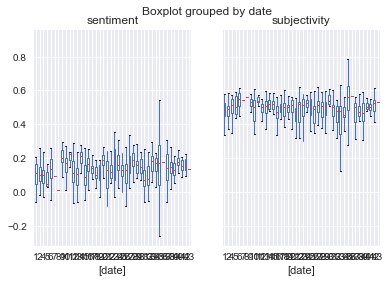

In [21]:
_=pd.DataFrame(sentiments)[['date','sentiment','subjectivity']].boxplot(by='date')

### Reading about the family of Shakespear, a child Hamnet was died at the age of 11 in year 1596; Although based on the above sentiment chart we don't see a shift from the overall sentiment levels (around 13-14). 

### The above high volatility in sentiment polarity is coming from Poetry, Sonnet plays. There is big number of that short plays with different sentiments.


In [22]:
play_scene_list1[play_scene_list1['Date']==35]

,act,literature_type,scene,scene_title,scene_url,text,title,Date
754,III,Poetry,sonnetIII,"III. Look in thy glass, and tell the face thou...",http://shakespeare.mit.edu/Poetry/sonnet.III.html,"Sonnet III\nSonnet III\nLook in thy glass, and...",The Sonnets,35
755,IV,Poetry,sonnetIV,"IV. Unthrifty loveliness, why dost thou spend",http://shakespeare.mit.edu/Poetry/sonnet.IV.html,"Sonnet IV\nSonnet IV\nUnthrifty loveliness, wh...",The Sonnets,35
756,V,Poetry,sonnetV,"V. Those hours, that with gentle work did frame",http://shakespeare.mit.edu/Poetry/sonnet.V.html,"Sonnet V\nSonnet V\nThose hours, that with gen...",The Sonnets,35
757,VI,Poetry,sonnetVI,VI. Then let not winter's ragged hand deface,http://shakespeare.mit.edu/Poetry/sonnet.VI.html,Sonnet VI\nSonnet VI\nThen let not winter's ra...,The Sonnets,35
758,VII,Poetry,sonnetVII,VII. Lo! in the orient when the gracious light,http://shakespeare.mit.edu/Poetry/sonnet.VII.html,Sonnet VII\nSonnet VII\nLo! in the orient when...,The Sonnets,35
759,VIII,Poetry,sonnetVIII,"VIII. Music to hear, why hear'st thou music sa...",http://shakespeare.mit.edu/Poetry/sonnet.VIII....,"Sonnet VIII\nSonnet VIII\nMusic to hear, why h...",The Sonnets,35
760,IX,Poetry,sonnetIX,IX. Is it for fear to wet a widow's eye,http://shakespeare.mit.edu/Poetry/sonnet.IX.html,Sonnet IX\nSonnet IX\nIs it for fear to wet a ...,The Sonnets,35
761,X,Poetry,sonnetX,"X. For shame! deny that thou bear'st love to any,",http://shakespeare.mit.edu/Poetry/sonnet.X.html,Sonnet X\nSonnet X\nFor shame! deny that thou ...,The Sonnets,35
762,XI,Poetry,sonnetXI,"XI. As fast as thou shalt wane, so fast thou g...",http://shakespeare.mit.edu/Poetry/sonnet.XI.html,Sonnet XI\nSonnet XI\nAs fast as thou shalt wa...,The Sonnets,35
763,XII,Poetry,sonnetXII,XII. When I do count the clock that tells the ...,http://shakespeare.mit.edu/Poetry/sonnet.XII.html,Sonnet XII\nSonnet XII\nWhen I do count the cl...,The Sonnets,35


### Now we will try adding some features to the data and see if they are changing over time, so track polarity and other new feaatures toghether over time

In [23]:
## Number of words in the text ##
play_scene_list1["num_words"] = play_scene_list1["text"].apply(lambda x: len(str(x).split()))

## Number of unique words in the text ##
play_scene_list1["num_unique_words"] = play_scene_list1["text"].apply(lambda x: len(set(str(x).split())))

## Number of characters in the text ##
play_scene_list1["num_chars"] = play_scene_list1["text"].apply(lambda x: len(str(x)))

## Number of stopwords in the text ##
eng_stopwords = nltk.corpus.stopwords.words('english')
play_scene_list1["num_stopwords"] = play_scene_list1["text"].apply(lambda x: len([w for w in str(x).lower().split() if w in eng_stopwords]))

## Number of punctuations in the text ##
play_scene_list1["num_punctuations"] =play_scene_list1['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]) )

## Number of upper case words in the text ##
play_scene_list1["num_words_upper"] = play_scene_list1["text"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

## Number of title case words in the text ##
play_scene_list1["num_words_title"] = play_scene_list1["text"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

## Average length of the words in the text ##
play_scene_list1["mean_word_len"] = play_scene_list1["text"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

## Number of noun phrases in text ## 
all_text = play_scene_list1.text.values
#TextBlob(train.iloc[3][1]).noun_phrases
play_scene_list1['num_noun_phrases'] =  [len(TextBlob(blobs).noun_phrases) for blobs in all_text]

In [24]:
## Average sentiment by word
play_scene_list1["avg_sentiment"] = play_scene_list1["text"].apply(lambda x: np.mean([TextBlob(w).sentiment.polarity for w in str(x).split()]))

In [25]:
## Number of words with positive sentiments
play_scene_list1["nb_words_positive"] = play_scene_list1["text"].apply(lambda x: sum([TextBlob(w).sentiment.polarity>0.2 for w in str(x).split()]))

## Number of words with negative sentiments
play_scene_list1["nb_words_negative"] = play_scene_list1["text"].apply(lambda x: sum([TextBlob(w).sentiment.polarity<-0.2 for w in str(x).split()]))

### Metrics analysis

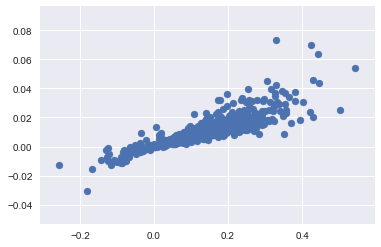

In [26]:
#diff=play_scene_list1["avg_sentiment"]-pd.DataFrame(sentiments)['sentiment']
plt.scatter(pd.DataFrame(sentiments)['sentiment'],play_scene_list1["avg_sentiment"])
plt.show()

### Just to do some testing, we can see that if we calculate the sentiment of the whole play directly or calculate the sentiment of each word in the play then average them, this will lead to different sentiment.

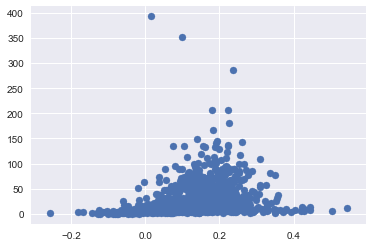

In [27]:
plt.scatter(pd.DataFrame(sentiments)['sentiment'],play_scene_list1["nb_words_positive"])
plt.show()

### The above plot confirms that plays with high number of words have a sentiment slightly positive but plays with lower number of words have more variabilities in sentiments

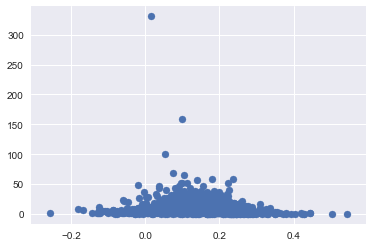

In [28]:
plt.scatter(pd.DataFrame(sentiments)['sentiment'],play_scene_list1["nb_words_negative"])
plt.show()

### The above is misleading and shows zero correlation between the sentiment of the whole play and the number of positive sentiments in each play (same for negative). Lets normalize these number by dividing over the number of words in each play 

In [29]:
## Number of words with positive sentiments
play_scene_list1["nb_words_positive_n"] = play_scene_list1["text"].apply(lambda x: sum([TextBlob(w).sentiment.polarity>0.2 for w in str(x).split()])/len(str(x).split()))

## Number of words with negative sentiments
play_scene_list1["nb_words_negative_n"] = play_scene_list1["text"].apply(lambda x: sum([TextBlob(w).sentiment.polarity<-0.2 for w in str(x).split()])/len(str(x).split()))

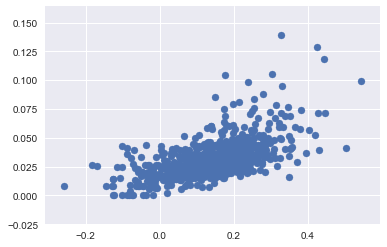

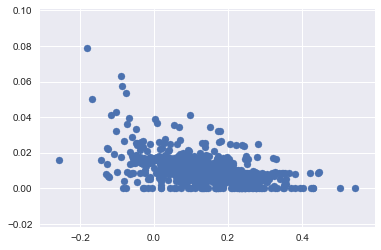

In [30]:
plt.scatter(pd.DataFrame(sentiments)['sentiment'],play_scene_list1["nb_words_positive_n"])
plt.show()
plt.scatter(pd.DataFrame(sentiments)['sentiment'],play_scene_list1["nb_words_negative_n"])
plt.show()

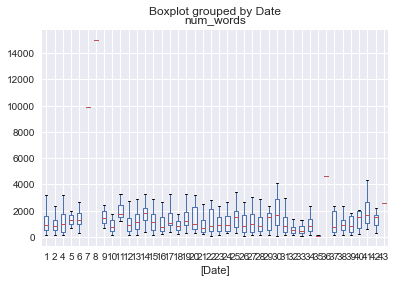

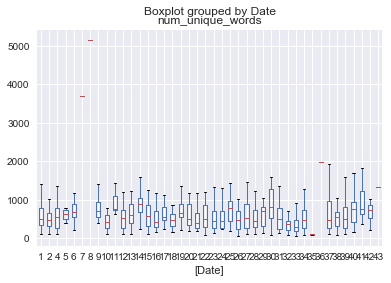

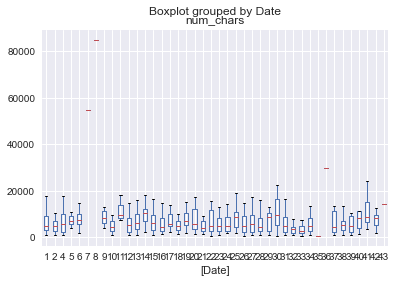

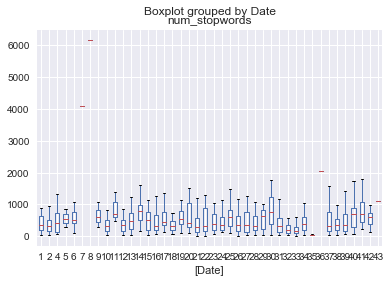

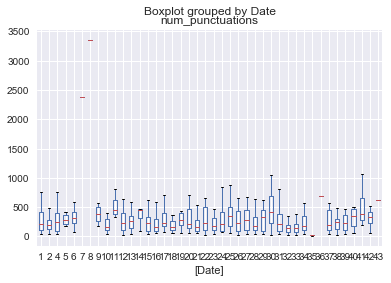

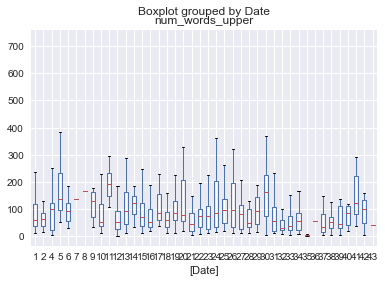

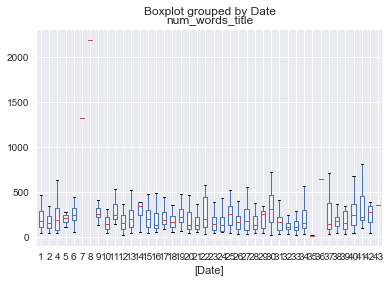

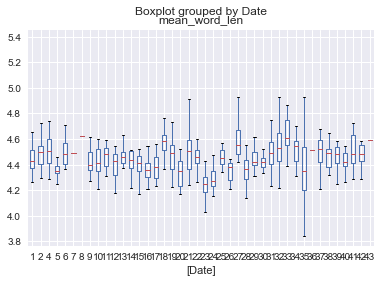

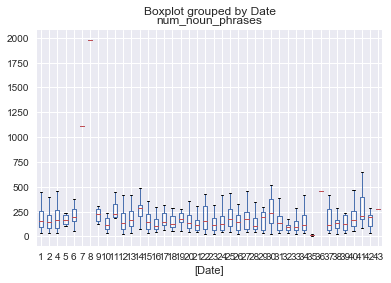

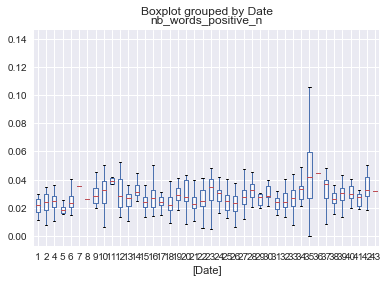

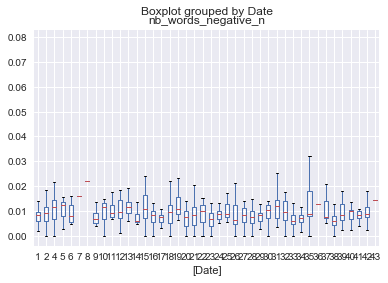

In [31]:
_=play_scene_list1[['Date','num_words']].boxplot(by='Date')
_=play_scene_list1[['Date','num_unique_words']].boxplot(by='Date')
_=play_scene_list1[['Date','num_chars']].boxplot(by='Date')
_=play_scene_list1[['Date','num_stopwords']].boxplot(by='Date')
_=play_scene_list1[['Date','num_punctuations']].boxplot(by='Date')
_=play_scene_list1[['Date','num_words_upper']].boxplot(by='Date')
_=play_scene_list1[['Date','num_words_title']].boxplot(by='Date')
_=play_scene_list1[['Date','mean_word_len']].boxplot(by='Date')
_=play_scene_list1[['Date','num_noun_phrases']].boxplot(by='Date')
_=play_scene_list1[['Date','nb_words_positive_n']].boxplot(by='Date')
_=play_scene_list1[['Date','nb_words_negative_n']].boxplot(by='Date')

### Therefore based on the above plots, we can conclude our hypothesis by saying that the structure and sentiment of shakespeare plays doesn't show any trend overtime (small changes with some volatility that can be random).